In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [14]:
os.chdir('INSERT_DATA_PATH_HERE')
swaption_data = pd.read_excel('swaption_cube_23.xlsx', sheet_name = 'ATM')
swaption_data.index = swaption_data.iloc[:,0]
swaption_data = swaption_data.iloc[:,1:]

C:\Users\Mikkel\AppData\Local\Temp\ipykernel_6832\2126588869.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


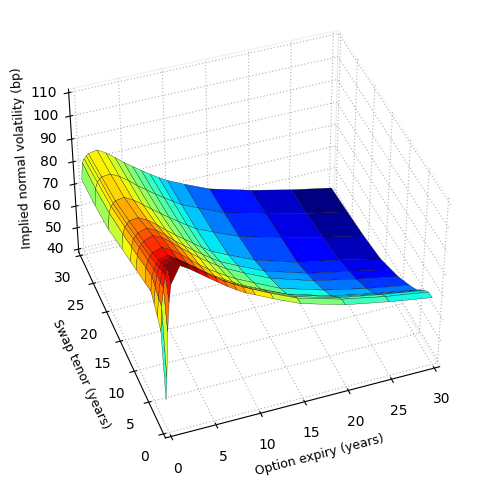

In [15]:
expiry = np.array([1/12, 3/12, 6/12, 9/12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30])
tenor = np.array([1, 2, 3, 4, 5, 7, 10, 12, 15, 20, 25, 30])
tenor, expiry = np.meshgrid(tenor, expiry)

fig = plt.figure()

ax = fig.gca(projection = '3d')
surf = ax.plot_surface(expiry, tenor, swaption_data,
                       rstride = 1, cstride = 1, linewidth = 0.2, edgecolor = 'k', cmap='jet')
ax.set_xlabel("Option expiry (years)", fontsize = 9)
ax.set_ylabel("Swap tenor (years)", fontsize = 9)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel("Implied normal volatility (bp)", rotation=93.5, fontsize = 9)

ax.axes.set_xlim3d(left=0, right=30) 
ax.axes.set_ylim3d(bottom=0, top=30) 
ax.axes.set_zlim3d(bottom=40, top=110)

ax.xaxis._axinfo["grid"].update({"linestyle":(0,(1,2))})
ax.yaxis._axinfo["grid"].update({"linestyle":(0,(1,2))})
ax.zaxis._axinfo["grid"].update({"linestyle":(0,(1,2))})
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.view_init(41, 250)
fig.tight_layout()